In [62]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

from scipy import stats
# Regular expressions
import re
#import sweetviz
# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from category_encoders.one_hot import OneHotEncoder

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

import platform
from platform import python_version
import jupyterlab
print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
from sklearn.metrics import mean_squared_error

seaborn version	: 0.11.1
System
os name: nt
system: Windows
release: 10

Python
version: 3.8.8

Python Packages
jupterlab==3.0.14
pandas==1.2.4
numpy==1.20.1


In [63]:
churn_df= pd.read_csv(r'C:\Users\npand\OneDrive\Desktop\MS_Course\ES508\Data\CHURN.csv')
churn_df.shape

(5000, 21)

## EDA

<AxesSubplot:xlabel='Data Type'>

Text(0.5, 1.0, 'Summary of Data-Type of attributes')

Text(0, 0.5, 'No of attributes')

(array([0, 1, 2]),
 [Text(0, 0, 'Discreet'), Text(1, 0, 'Numerical'), Text(2, 0, 'categorical')])

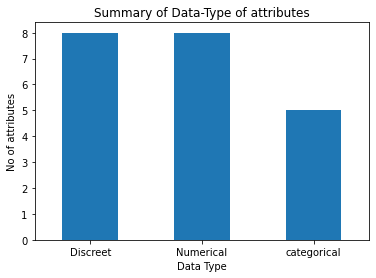

In [64]:
## For Data-type description

a=pd.DataFrame(churn_df.dtypes).rename(columns={0:'Data Type'})
mapd={'int64': 'Discreet','float64':'Numerical','object':'categorical'}
a=a['Data Type'].replace(mapd)
a=pd.DataFrame(a).rename(columns={0:'Data Type'})
a.groupby('Data Type').size().plot(kind='bar')
plt.title('Summary of Data-Type of attributes')
#plt.xlabel('Churn Status')
plt.ylabel('No of attributes')
plt.xticks(rotation=0) 
#plt.legend(loc='upper left')


In [65]:
## Changing the  targets 
churn_df.rename(columns={'Churn?':'Churn','Account Length':'Duration'},inplace=True)
churn_df['Churn']=np.where(churn_df.Churn=='True.',1,0)
churn_df.head(2)
churn_df.Churn.value_counts(normalize=True)

,State,Duration,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,PA,163,806,403-2562,no,yes,300,8.1622,3,7.5792,3.9330,4,6.5086,4.0658,100,5.1116,4.9282,6,5.6732,3,1
1,SC,15,836,158-8416,yes,no,0,10.0190,4,4.2263,2.3250,0,9.9726,7.1410,200,6.4362,3.2217,6,2.5597,8,0


NumExpr defaulting to 8 threads.


0   0.5004
1   0.4996
Name: Churn, dtype: float64

In [67]:
targets=['Duration','Churn']
num_cols=churn_df.select_dtypes(exclude='object').columns
cat_cols=churn_df.select_dtypes(include='object').columns
num_cols
cat_cols

Index(['Duration', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn', 'min_per_day_call', 'min_per_eve_call',
       'min_per_night_call', 'min_per_Intl_call', 'charge_per_day_call',
       'charge_per_eve_call', 'charge_per_night_call', 'charge_per_Intl_call'],
      dtype='object')

Index(['State', 'Phone', 'Intl Plan', 'VMail Plan'], dtype='object')

In [66]:
## Creating new variables
churn_df['min_per_day_call']= churn_df['Day Mins']/churn_df['Day Calls']
churn_df['min_per_eve_call']= churn_df['Eve Mins']/churn_df['Eve Calls']
churn_df['min_per_night_call']= churn_df['Night Mins']/churn_df['Night Calls']
churn_df['min_per_Intl_call']= churn_df['Intl Mins']/churn_df['Intl Calls']

churn_df['charge_per_day_call']= churn_df['Day Charge']/churn_df['Day Calls']
churn_df['charge_per_eve_call']= churn_df['Eve Charge']/churn_df['Eve Calls']
churn_df['charge_per_night_call']= churn_df['Night Charge']/churn_df['Night Calls']
churn_df['charge_per_Intl_call']= churn_df['Intl Charge']/churn_df['Intl Calls']


<AxesSubplot:xlabel='Churn', ylabel='min_per_day_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_day_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_eve_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_eve_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_night_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_night_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_Intl_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_Intl_call'>

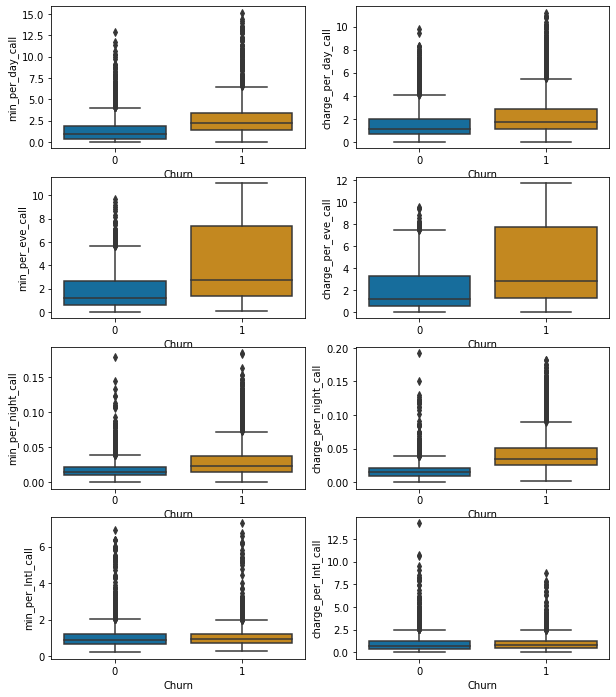

In [68]:
## Box plots 
fig,ar = plt.subplots(nrows=4,ncols=2,figsize=(10,12))
sns.boxplot(x='Churn',y='min_per_day_call', 
                 data=churn_df, 
                 palette="colorblind",
                ax=ar[0,0]
                 )
sns.boxplot(x='Churn',y='charge_per_day_call', 
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[0,1]
                 )

sns.boxplot(x='Churn',y='min_per_eve_call', 
                 data=churn_df, 
                 palette="colorblind",
                ax=ar[1,0]
                 )
sns.boxplot(x='Churn',y='charge_per_eve_call', 
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1,1]
                 )

sns.boxplot(x='Churn',y='min_per_night_call', 
                 data=churn_df, 
                 palette="colorblind",
                ax=ar[2,0]
                 )
sns.boxplot(x='Churn',y='charge_per_night_call', 
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[2,1]
                 )

sns.boxplot(x='Churn',y='min_per_Intl_call', 
                 data=churn_df, 
                 palette="colorblind",
                ax=ar[3,0]
                 )
sns.boxplot(x='Churn',y='charge_per_Intl_call', 
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[3,1]
                 )

<AxesSubplot:xlabel='Day Calls'>

Text(0.5, 1.0, 'Bar Chart of Number of Day calls for Churn and Non-Churn Customers')

Text(0.5, 0, 'Churn Status')

Text(0, 0.5, 'No of Calls')

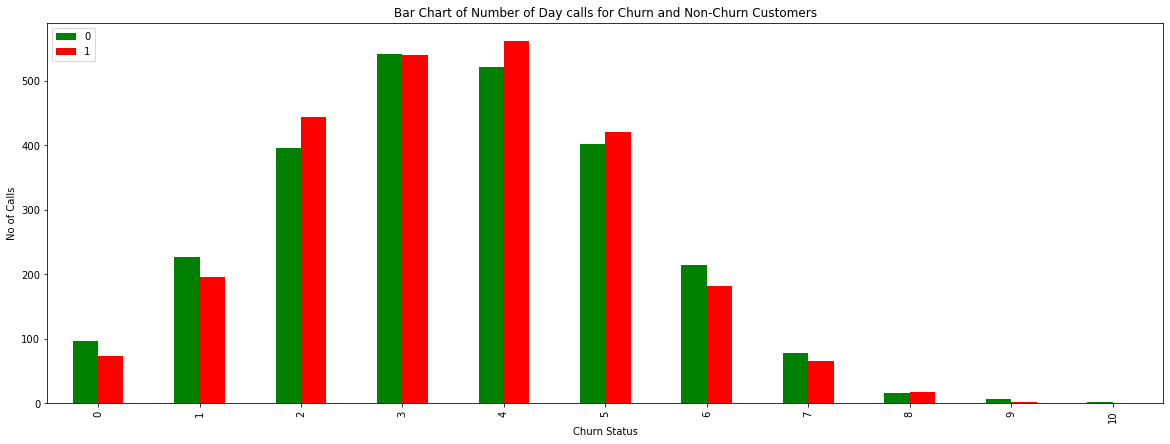

In [186]:

table=pd.crosstab(churn_df['Day Calls'],churn_df.Churn)
#table=table.sort_values(by=1, ascending=False)
table.plot(kind='bar',stacked=False,color=['g','r'],figsize=(20,7))

plt.title('Bar Chart of Number of Day calls for Churn and Non-Churn Customers')
plt.xlabel('Churn Status')
plt.ylabel('No of Calls')
plt.legend(loc='upper left')


[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Day call duration distribution vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Day call charge distribution vs Churn Status')

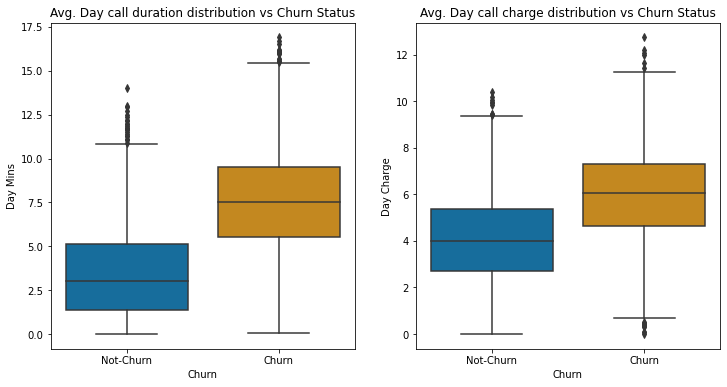

In [201]:
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Day Mins',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg. Day call duration distribution vs Churn Status")
ar[1]=sns.boxplot(y='Day Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Day call charge distribution vs Churn Status")


[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Evening call duration vs Churn Status')

[Text(0, 0, 'Not-Churn'), Text(1, 0, 'Churn')]

Text(0.5, 1.0, 'Avg. Evening call charge vs Churn Status')

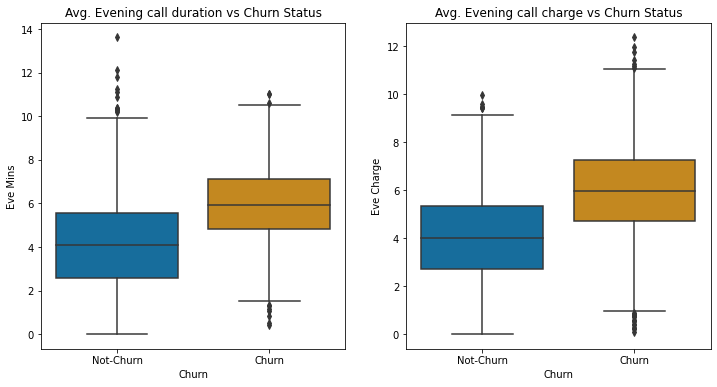

In [206]:
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ar[0]=sns.boxplot(y='Eve Mins',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                 ax=ar[0] 
                 )
ar[0].set_xticklabels(['Not-Churn','Churn'])
ar[0].set_title("Avg. Evening call duration vs Churn Status")
ar[1]=sns.boxplot(y='Eve Charge',x='Churn',
                 data=churn_df, 
                 palette="colorblind",
                  ax=ar[1]
                 )
ar[1].set_xticklabels(['Not-Churn','Churn'])
plt.title("Avg. Evening call charge vs Churn Status")
## It clearly shows that person having high Credit Limit are likely to pay. 
## There are few outliers in both groups

<AxesSubplot:xlabel='Churn', ylabel='Eve Charge'>

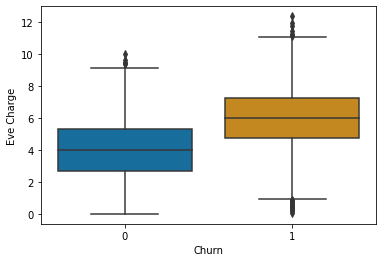

In [37]:
sns.boxplot(x='Churn',y='Eve Charge',
                 data=churn_df, 
                 palette="colorblind"
                 )

<AxesSubplot:xlabel='Churn', ylabel='Night Charge'>

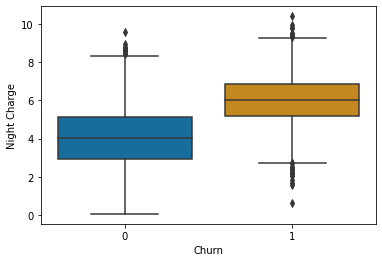

In [48]:
sns.boxplot(x='Churn',y='Night Charge',
                 data=churn_df, 
                 palette="colorblind"
                 )


<AxesSubplot:xlabel='Night Charge', ylabel='Density'>

<AxesSubplot:xlabel='Night Charge', ylabel='Density'>

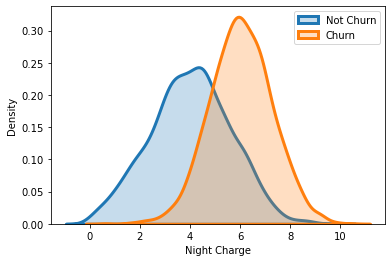

In [53]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Night Charge']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Night Charge']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()

<AxesSubplot:xlabel='CustServ Calls', ylabel='Density'>

<AxesSubplot:xlabel='CustServ Calls', ylabel='Density'>

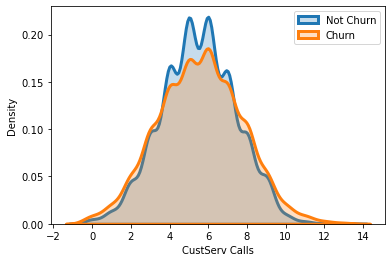

In [211]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'CustServ Calls']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'CustServ Calls']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()

<AxesSubplot:xlabel='Night Calls', ylabel='Density'>

<AxesSubplot:xlabel='Night Calls', ylabel='Density'>

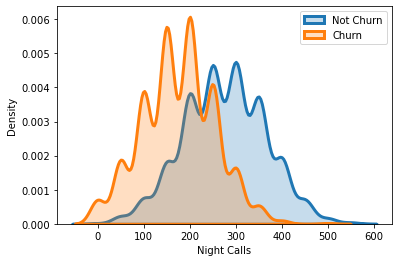

In [50]:
x1 = churn_df.loc[churn_df['Churn'] == 1, 'Night Calls']
x0 = churn_df.loc[churn_df['Churn'] == 0, 'Night Calls']

Repay = ['Not Churn','Churn']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not Churn')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Churn')
plt.legend()


In [226]:
churn_df[(churn_df['VMail Plan']=='no') & (churn_df['Intl Plan']=='no')].Churn.mean()
churn_df[(churn_df['VMail Plan']=='yes') & (churn_df['Intl Plan']=='yes')].Churn.mean()

churn_df[(churn_df['Intl Plan']=='no')].Churn.mean()
churn_df[(churn_df['Intl Plan']=='yes')].Churn.mean()

0.4924060751398881

0.4872611464968153

0.5009972078181093

0.4981949458483754

In [229]:
pd.pivot_table(data=churn_df,index=churn_df['Intl Plan'], columns=churn_df['VMail Plan'],values=['Churn','Duration'],aggfunc='mean')

Churn        Duration         
VMail Plan     no    yes       no      yes
Intl Plan                                 
no         0.4924 0.5096 101.4069 101.9785
yes        0.5093 0.4873 102.4640 100.8646

<AxesSubplot:xlabel='Churn', ylabel='Night Mins'>

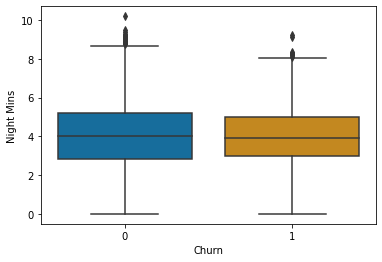

In [46]:
sns.boxplot(x='Churn',y='Night Mins
            ',
                 data=churn_df, 
                 palette="colorblind"
                 )

In [266]:
churn_df.groupby('Area Code').Churn.mean().sort_values(ascending=False).apply(lambda x: x*100)[:8]

Area Code
659   56.6667
678   56.1798
736   53.2710
776   53.2646
758   52.9412
798   52.9412
786   52.8169
778   52.5510
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Area Code'>

Text(0, 0.5, 'Churn rate (%)')

Text(0.5, 1.0, 'Churn rate for State')

<AxesSubplot:xlabel='VMail Plan'>

Text(0, 0.5, 'Churn rate (%)')

Text(0.5, 1.0, 'Churn rate vs VMail plan for NY')

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

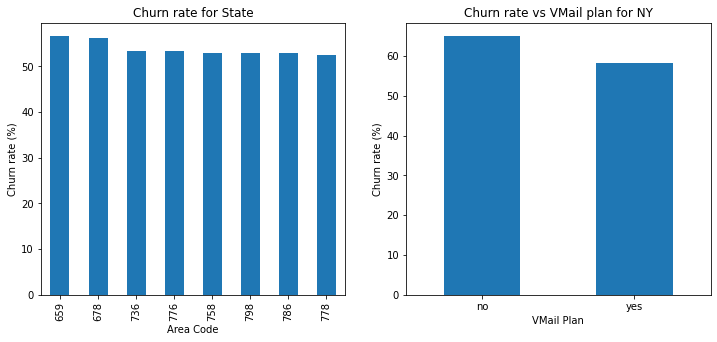

In [264]:
fig,ar = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
churn_df.groupby('Area Code').Churn.mean().sort_values(ascending=False).apply(lambda x: x*100)[:8].plot(kind='bar',ax=ar[0])
ar[0].set_ylabel("Churn rate (%)")
ar[0].set_title("Churn rate for State")
churn_df[churn_df.State=='NY'].groupby('VMail Plan').Churn.mean().apply(lambda x: x*100).plot(kind='bar',ax=ar[1])
plt.ylabel("Churn rate (%)")
plt.title("Churn rate vs VMail plan for NY")
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Churn', ylabel='min_per_day_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_day_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_eve_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_eve_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_night_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_night_call'>

<AxesSubplot:xlabel='Churn', ylabel='min_per_Intl_call'>

<AxesSubplot:xlabel='Churn', ylabel='charge_per_Intl_call'>

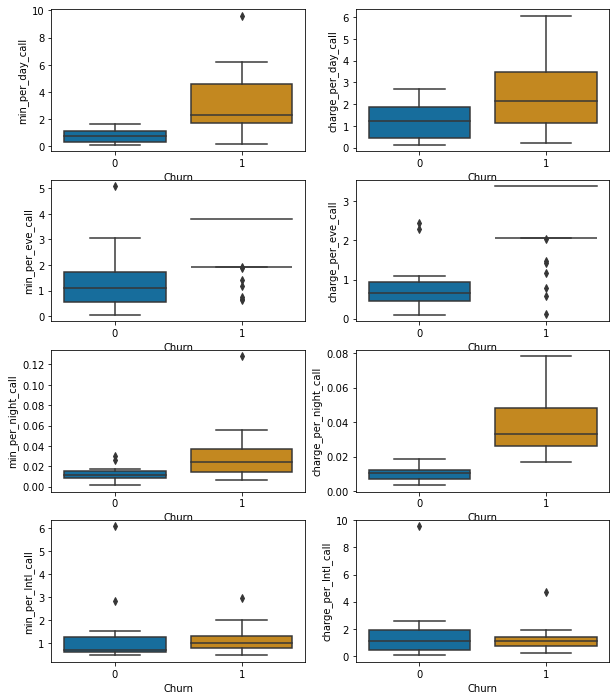

In [184]:
##
temp=churn_df[(churn_df.State=='NY') & (churn_df['VMail Plan']=='no') ]
fig,ar = plt.subplots(nrows=4,ncols=2,figsize=(10,12))
sns.boxplot(x='Churn',y='min_per_day_call', 
                 data=temp, 
                 palette="colorblind",
                ax=ar[0,0]
                 )
sns.boxplot(x='Churn',y='charge_per_day_call', 
                 data=temp, 
                 palette="colorblind",
                  ax=ar[0,1]
                 )

sns.boxplot(x='Churn',y='min_per_eve_call', 
                 data=temp, 
                 palette="colorblind",
                ax=ar[1,0]
                 )
sns.boxplot(x='Churn',y='charge_per_eve_call', 
                 data=temp, 
                 palette="colorblind",
                  ax=ar[1,1]
                 )

sns.boxplot(x='Churn',y='min_per_night_call', 
                 data=temp, 
                 palette="colorblind",
                ax=ar[2,0]
                 )
sns.boxplot(x='Churn',y='charge_per_night_call', 
                 data=temp, 
                 palette="colorblind",
                  ax=ar[2,1]
                 )

sns.boxplot(x='Churn',y='min_per_Intl_call', 
                 data=temp, 
                 palette="colorblind",
                ax=ar[3,0]
                 )
sns.boxplot(x='Churn',y='charge_per_Intl_call', 
                 data=temp, 
                 palette="colorblind",
                  ax=ar[3,1]
                 )

<AxesSubplot:xlabel='Intl Plan'>

Text(0.5, 1.0, 'Stacked Bar Chart of first ever bounce vs Risk')

Text(0.5, 0, 'Vmail Plan')

Text(0, 0.5, 'Churn proportion')

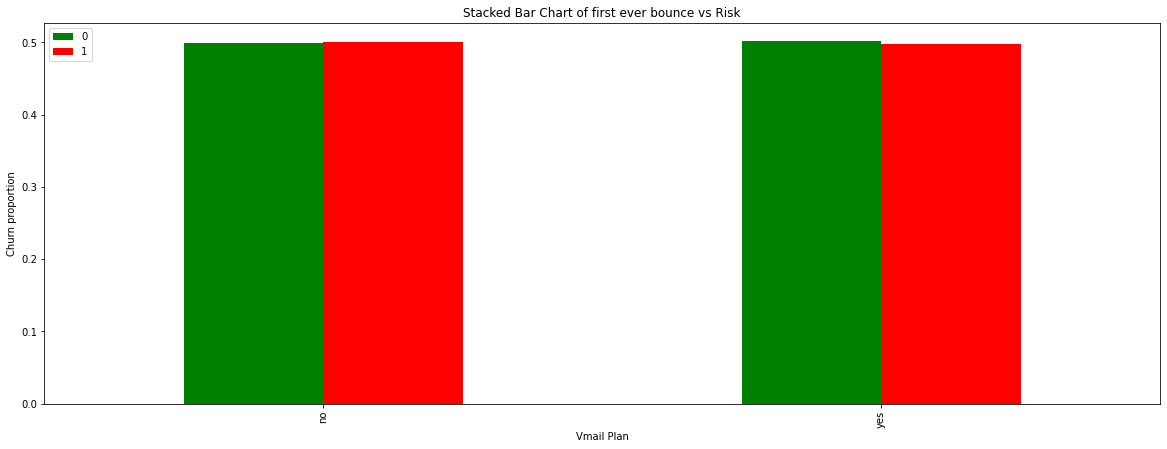

In [214]:

table=pd.crosstab(churn_df['Intl Plan'],churn_df.Churn)
table=table.sort_values(by=1, ascending=False)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False,color=['g','r'],figsize=(20,7))

plt.title('Stacked Bar Chart of first ever bounce vs Risk')
plt.xlabel('Vmail Plan')
plt.ylabel('Churn proportion')
plt.legend(loc='upper left')


<AxesSubplot:xlabel='State'>

Text(0.5, 1.0, 'Stacked Bar Chart of first ever bounce vs Risk')

Text(0.5, 0, 'Vmail Plan')

Text(0, 0.5, 'Churn proportion')

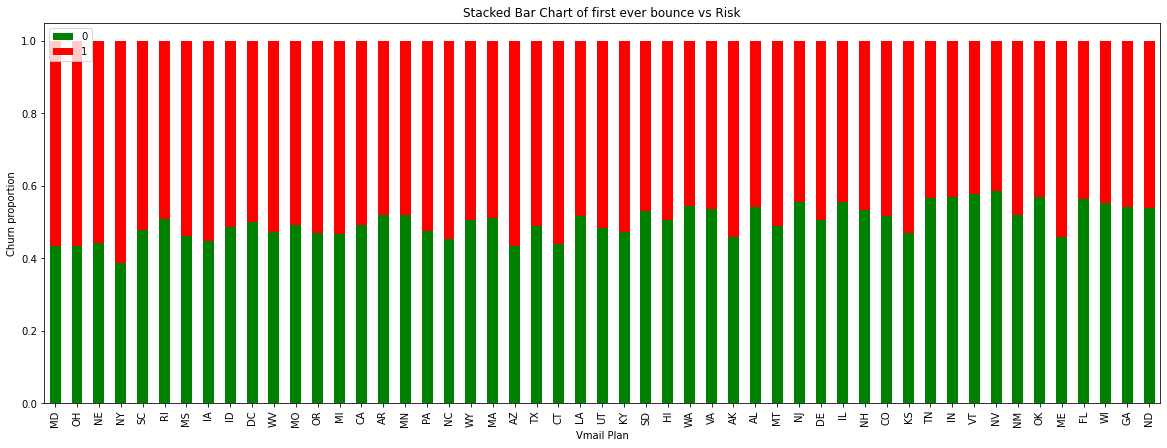

In [104]:

table=pd.crosstab(churn_df['State'],churn_df.Churn)
table=table.sort_values(by=1, ascending=False)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,color=['g','r'],figsize=(20,7))

plt.title('Stacked Bar Chart of first ever bounce vs Risk')
plt.xlabel('Vmail Plan')
plt.ylabel('Churn proportion')
plt.legend(loc='upper left')


## Duration of stay

<AxesSubplot:xlabel='Duration', ylabel='Night Charge'>

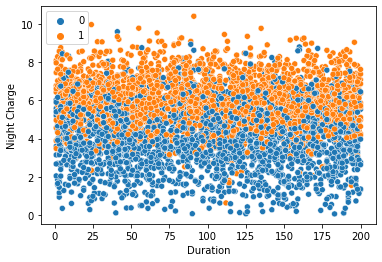

In [64]:
sns.scatterplot(churn_df['Duration'],churn_df['Night Charge'],hue=churn_df.Churn)
plt.legend()

## Feature selection

In [351]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [294]:
churn_df['min_per_day_call']= churn_df['Day Mins']/churn_df['Day Calls']
churn_df['min_per_eve_call']= churn_df['Eve Mins']/churn_df['Eve Calls']
churn_df['min_per_night_call']= churn_df['Night Mins']/churn_df['Night Calls']
churn_df['min_per_Intl_call']= churn_df['Intl Mins']/churn_df['Intl Calls']

churn_df['charge_per_day_call']= churn_df['Day Charge']/churn_df['Day Calls']
churn_df['charge_per_eve_call']= churn_df['Eve Charge']/churn_df['Eve Calls']
churn_df['charge_per_night_call']= churn_df['Night Charge']/churn_df['Night Calls']
churn_df['charge_per_Intl_call']= churn_df['Intl Charge']/churn_df['Intl Calls']

churn_df.charge_per_day_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_day_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_day_call).values.sum()
np.isinf(churn_df.min_per_day_call).values.sum()

churn_df.charge_per_eve_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_eve_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_eve_call).values.sum()
np.isinf(churn_df.min_per_eve_call).values.sum()

churn_df.charge_per_night_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_night_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_night_call).values.sum()
np.isinf(churn_df.min_per_night_call).values.sum()

churn_df.charge_per_Intl_call.replace(np.inf, 0, inplace=True)
churn_df.min_per_Intl_call.replace(np.inf, 0, inplace=True)
np.isinf(churn_df.charge_per_Intl_call).values.sum()
np.isinf(churn_df.min_per_Intl_call).values.sum()


0

0

0

0

0

0

0

0

In [295]:
train_df=churn_df.copy()
train_df.drop(columns=['Phone','Area Code'],inplace=True)
train_df['VMail Plan']= np.where(train_df['VMail Plan']=='yes',1,0)
train_df['Intl Plan']= np.where(train_df['Intl Plan']=='yes',1,0)
num_cols=train_df.drop(columns=['Duration','Churn']).select_dtypes(exclude='object').columns.to_list()
cat_cols=train_df.drop(columns=['Duration','Churn']).select_dtypes(include='object').columns.to_list()

In [297]:
ohe_encoder = OneHotEncoder(cols=cat_cols,use_cat_names=True) 
encoded_train = ohe_encoder.fit_transform(train_df[num_cols+cat_cols]) 
encoded_train=encoded_train.reset_index(drop=True)
encoded_train.head()
y_train=churn_df.Churn.to_list()

,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,min_per_day_call,min_per_eve_call,min_per_night_call,min_per_Intl_call,charge_per_day_call,charge_per_eve_call,charge_per_night_call,charge_per_Intl_call,State_PA,State_SC,State_MO,State_WY,State_VA,State_IN,State_LA,State_AL,State_CA,State_RI,State_GA,State_ND,State_MS,State_NY,State_NJ,State_NM,State_ID,State_DE,State_IL,State_WA,State_UT,State_MI,State_WI,State_MA,State_MN,State_WV,State_OK,State_FL,State_NH,State_CO,State_HI,State_IA,State_NE,State_KY,State_AZ,State_SD,State_OH,State_MT,State_NC,State_ME,State_CT,State_TX,State_MD,State_NV,State_DC,State_AR,State_OR,State_KS,State_AK,State_TN,State_VT
0,0,1,300,8.1622,3,7.5792,3.9330,4,6.5086,4.0658,100,5.1116,4.9282,6,5.6732,3,2.7207,0.9833,0.0407,0.8214,2.5264,1.6272,0.0511,0.9455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,10.0190,4,4.2263,2.3250,0,9.9726,7.1410,200,6.4362,3.2217,6,2.5597,8,2.5047,0.0000,0.0357,0.5370,1.0566,0.0000,0.0322,0.4266,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,300,4.7085,3,4.7682,4.5375,3,4.5667,5.3632,100,5.1425,7.1390,2,6.2542,4,1.5695,1.5125,0.0536,3.5695,1.5894,1.5222,0.0514,3.1271,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,700,1.2687,3,2.5676,2.5287,5,2.3336,3.7736,450,3.8144,2.2458,6,1.0807,6,0.4229,0.5057,0.0084,0.3743,0.8559,0.4667,0.0085,0.1801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2.6962,3,5.9089,6.0153,3,3.6704,3.7517,250,2.7968,6.9055,4,7.1343,6,0.8987,2.0051,0.0150,1.7264,1.9696,1.2235,0.0112,1.7836,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [298]:
rftree=RandomForestClassifier(criterion='entropy')
rftree.fit(encoded_train,y_train)

RandomForestClassifier(criterion='entropy')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='importance', ylabel='features'>

Text(0.5, 1.0, 'RANDOM FORESTFEATURE IMPORTANCE')

Text(0.5, 0, 'FEATURE IMPORTANCE (TOP-15)')

Text(0, 0.5, 'FEATURE NAMES')

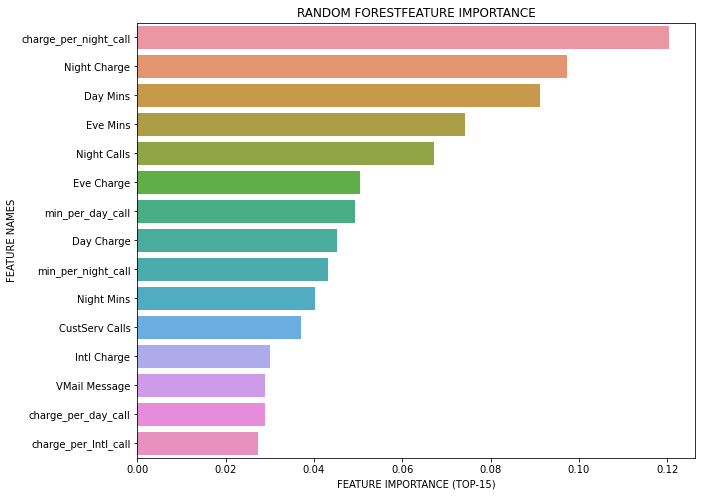

In [309]:
clust_cols=encoded_train.columns

feat_imp_df=pd.DataFrame({'features':clust_cols,
                          'importance':rftree.feature_importances_})
feat_imp_df.sort_values(by=['importance'], ascending=False,inplace=True)
#print(feat_imp_df.sort_values('importance',ascending=False).iloc[:25])
feat_imp_df=feat_imp_df.sort_values('importance',ascending=False).iloc[:15]
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=feat_imp_df['importance'], y=feat_imp_df['features'])
#Add chart labels
plt.title('RANDOM FOREST' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE (TOP-15)')
plt.ylabel('FEATURE NAMES')

In [314]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [315]:

#lgr=LogisticRegression()
xgb=XGBClassifier()
#rfe = RFECV(estimator=lgr,step=1,cv=5)
rfe = RFE(estimator=xgb,n_features_to_select=15,step=1)
rfe = rfe.fit(encoded_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

sel_fets= encoded_train.columns[rfe.support_]
sel_fets

[21:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Index(['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'min_per_Intl_call',
       'charge_per_night_call', 'charge_per_Intl_call'],
      dtype='object')

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

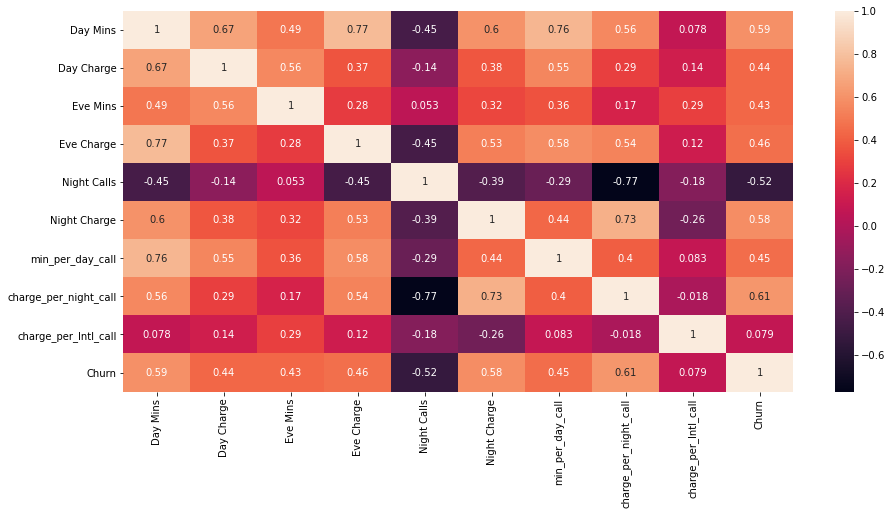

In [330]:
## Using SPEARMAN's method
plt.figure(figsize=(15,7))
sns.heatmap(churn_df[num_cols_s].join(churn_df.Churn).corr(method="spearman"),annot=True)

In [329]:
num_cols_s=['Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'min_per_day_call',
 'charge_per_night_call',
 'charge_per_Intl_call']

In [332]:
print(num_cols_s)

['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Calls', 'Night Charge', 'min_per_day_call', 'charge_per_night_call', 'charge_per_Intl_call']


In [334]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5000 total observations, 2502 right-censored observations>

<AxesSubplot:xlabel='timeline'>

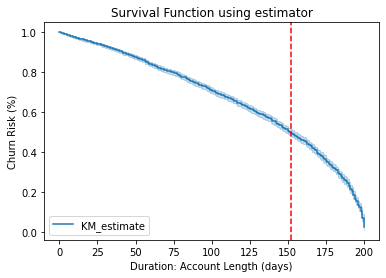

In [342]:
kmf = KaplanMeierFitter()

kmf.fit(churn_df['Duration'], event_observed=churn_df['Churn'])

kmf.plot_survival_function()
_=plt.title('Survival Function using estimator');
_=plt.xlabel("Duration: Account Length (days)")
_=plt.ylabel("Churn Risk (%)")
_=plt.axvline(x=kmf.median_survival_time_, color='red', linestyle='--')

## Training  the base model without any optimization

In [368]:

churn_df['Area Code'] = churn_df['Area Code'].astype('category')
churn_df['Churn'] = churn_df['Churn'].astype('int')

churn_df.drop(columns=['Phone'],inplace=True,errors='ignore')
churn_df = churn_df.dropna()
churn_df = churn_df.drop_duplicates()

In [369]:
X_train, X_test = train_test_split(churn_df , test_size=0.20, random_state=43)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import DataConversionWarning

In [373]:
## Creating Preprocessing Pipeline

numerical_idx = (
        X_train.select_dtypes(exclude=["object", "category"])
        .drop(['Churn','Duration'],1)
        .columns.tolist()
    )

categorical_idx = (X_train.select_dtypes(exclude=["float", "int"])
.drop(['Duration'],1)
.columns.tolist()
                  )

numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]
    )

categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
        ]
    )

preprocessor = ColumnTransformer(
        [
            ("numerical", numeric_transformer, numerical_idx),
            ("categorical", categorical_transformer, categorical_idx),
        ],
        remainder="passthrough",
    )

train_features = preprocessor.fit_transform(X_train.drop(['Churn','Duration'],1))
test_features = preprocessor.transform(X_test.drop(['Churn','Duration'],1))

In [379]:
def survival_y_cox(dframe:pd.DataFrame) -> np.array:
    """Returns array of outcome encoded for XGB"""
    y_survival = []

    for idx, row in dframe[["Duration", "Churn"]].iterrows():
        if row["Churn"]:
            # uncensored
            y_survival.append(int(row["Duration"]))
        else:
            # right censored
            y_survival.append(-int(row["Duration"]))
    return np.array(y_survival)

In [380]:
import xgboost as xgb

In [381]:
feature_names = np.hstack((np.array(numerical_idx),
                           preprocessor.transformers_[1][1]['onehot'].get_feature_names()))

dm_train = xgb.DMatrix(
    train_features, label=survival_y_cox(X_train), feature_names=feature_names
)

dm_test = xgb.DMatrix(
    test_features, label=survival_y_cox(X_test), feature_names=feature_names
)

In [382]:
params = {
    "eta": 0.1,
    "max_depth": 3, 
    "objective": "survival:cox",
    "tree_method": "hist",
    "subsample": 0.8,
    "seed": 123
}
bst = xgb.train(
    params,
    dm_train,
    num_boost_round=300,
    evals=[(dm_train, "train"), (dm_test, "test")],
    verbose_eval=int(1e1),
    early_stopping_rounds=10
)

[0]	train-cox-nloglik:7.25690	test-cox-nloglik:5.83485
[10]	train-cox-nloglik:6.98911	test-cox-nloglik:5.60167
[20]	train-cox-nloglik:6.89641	test-cox-nloglik:5.52895
[30]	train-cox-nloglik:6.85336	test-cox-nloglik:5.50237
[40]	train-cox-nloglik:6.82289	test-cox-nloglik:5.49297
[50]	train-cox-nloglik:6.79789	test-cox-nloglik:5.48350
[60]	train-cox-nloglik:6.77323	test-cox-nloglik:5.48058
[70]	train-cox-nloglik:6.75332	test-cox-nloglik:5.47637
[80]	train-cox-nloglik:6.73444	test-cox-nloglik:5.47532
[85]	train-cox-nloglik:6.72471	test-cox-nloglik:5.47459


In [384]:

%%capture 

X_test.loc[:,"preds"] = bst.predict(dm_test, output_margin=True) 
X_test.loc[:, "preds_exp"] = bst.predict(dm_test, output_margin=False)

Text(0, 0.5, 'Churn Risk')

Text(0.5, 1.0, 'Relation of Churn-Risk over time ')

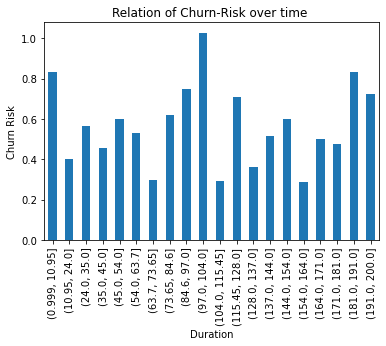

In [391]:
_=X_test.groupby(pd.qcut(X_test['Duration'], q=20))['preds_exp'].median().plot(kind="bar")
plt.ylabel("Churn Risk")
plt.title("Relation of Churn-Risk over time ")